# Load `python` libraries for some EDA and wrangling

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [54]:
df_cl_mg = pd.read_csv("cleaned_merged_datasets.csv")


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Check how _area_ and _price_ are distributed

In [55]:
# Distribution of area for 'Rent'
percl_area_Rent = df_cl_mg[(df_cl_mg["purpose"] == "Rent")]["area"].describe(percentiles=[.01, .02, .3, .6, .9, 0.95, .99])
# percl_area_Rent

# Distribution of area for 'Sale'
percl_area_Sale = df_cl_mg[(df_cl_mg["purpose"] == "Sale")]["area"].describe(percentiles=[.01, .02, .3, .6, .9, 0.95, .99])
# percl_area_Sale

# Distribution of prices for 'Rent'
percl_price_Rent = df_cl_mg[(df_cl_mg["purpose"] == "Rent")]["price"].describe(percentiles=[.01, .02, .3, .6, .9, 0.95, .99])
# percl_price_Rent

# Distribution of prices for 'Sale'
percl_price_Sale = df_cl_mg[(df_cl_mg["purpose"] == "Sale")]["price"].describe(percentiles=[.01, .02, .3, .6, .9, 0.95, .99])
# percl_price_Sale

In [56]:
print(percl_area_Rent, '\n\n', percl_area_Sale)

count    2.072300e+04
mean     4.241257e+03
std      1.555526e+05
min      0.000000e+00
1%       0.000000e+00
2%       0.000000e+00
30%      1.000000e+03
50%      1.400000e+03
60%      1.650000e+03
90%      3.373000e+03
95%      5.000000e+03
99%      1.200000e+04
max      1.450147e+07
Name: area, dtype: float64 

 count     12978.000000
mean       1664.862321
std        3755.222407
min           1.000000
1%          115.000000
2%          135.000000
30%        1150.000000
50%        1320.000000
60%        1445.000000
90%        2289.300000
95%        3600.000000
99%        7218.216000
max      296600.000000
Name: area, dtype: float64


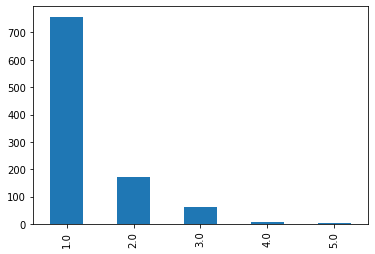

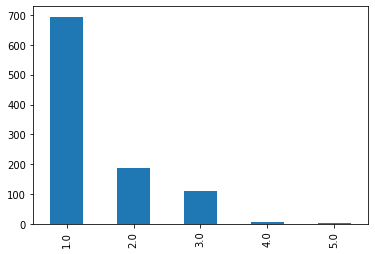

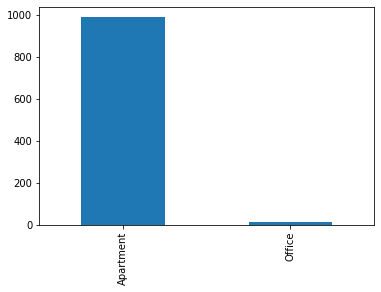

In [57]:
feature1 = 'num_bath_rooms'
feature2 = 'num_bed_rooms'
feature3 = 'building_type'

df_cl_mg[df_cl_mg.area == 0][feature1].value_counts().plot(kind = 'bar')
plt.show()

df_cl_mg[df_cl_mg.area == 0][feature2].value_counts().plot(kind = 'bar')
plt.show()

df_cl_mg[df_cl_mg.area == 0][feature3].value_counts().plot(kind = 'bar')
plt.show()

In [58]:
print(percl_price_Rent, '\n\n', percl_price_Sale)

count    2.072300e+04
mean     1.048616e+07
std      8.390854e+08
min      0.000000e+00
1%       0.000000e+00
2%       0.000000e+00
30%      2.000000e+04
50%      3.300000e+04
60%      5.000000e+04
90%      3.800000e+05
95%      7.350000e+05
99%      2.500000e+06
max      1.000000e+11
Name: price, dtype: float64 

 count    1.297800e+04
mean     2.762862e+09
std      2.124047e+11
min      0.000000e+00
1%       1.700000e+06
2%       2.263500e+06
30%      5.500000e+06
50%      7.350000e+06
60%      8.350000e+06
90%      2.100000e+07
95%      3.800000e+07
99%      5.423000e+09
max      2.400000e+13
Name: price, dtype: float64


In [59]:
df_cl_mg.shape

(33701, 24)

## Create a "clean" dataset for _Sale_
    . Subset to "Sale"
    . Only "Apartments"
    . Get rid of area and price outliers

In [60]:
df_sale = df_cl_mg[(df_cl_mg.purpose == 'Sale')  &
                   (df_cl_mg.building_type == 'Apartment')  &
                   (df_cl_mg.area > percl_area_Sale['1%']) & 
                   (df_cl_mg.area <= percl_area_Sale['99%']) & 
                  (df_cl_mg.price <= percl_price_Sale['95%']) &
                   (df_cl_mg.price > percl_price_Sale['2%'])
                  ][['price', 'area', 'num_bath_rooms', 'num_bed_rooms', 'zone', 'building_nature']]

In [61]:
df_sale.building_nature.value_counts()

Residential    10737
Commercial         3
Name: building_nature, dtype: int64

**Not many 'Commercial' `building_nature`**

In [62]:
# df_sale.drop('building_nature', axis = 1, inplace = True)

In [63]:
# df_sale['price'].describe(percentiles=[0.02, .3, .6, .9, 0.95, .99])

In [64]:
df_sale.describe(include='all').T

count unique          top   freq            mean  \
price            10740.0    NaN          NaN    NaN  8791256.480066   
area             10740.0    NaN          NaN    NaN     1362.240782   
num_bath_rooms   10740.0    NaN          NaN    NaN        1.621415   
num_bed_rooms    10740.0    NaN          NaN    NaN        2.924022   
zone               10714     53       Mirpur   3671             NaN   
building_nature    10740      2  Residential  10737             NaN   

                            std        min        25%        50%         75%  \
price            5330544.604312  2275000.0  5250000.0  7200000.0  10500000.0   
area                 437.435757      250.0     1100.0     1300.0      1550.0   
num_bath_rooms         1.516912        0.0        0.0        2.0         3.0   
num_bed_rooms            0.5266        0.0        3.0        3.0         3.0   
zone                        NaN        NaN        NaN        NaN         NaN   
building_nature             NaN        NaN        NaN        NaN         NaN   

                        max  
price            38000000.0  
area                 6357.0  
num_bath_rooms          8.0  
num_bed_rooms           7.0  
zone                    NaN  
building_nature         NaN

## Data imputation & transformation

#### How many properties don't have `num_bath_rooms` info?
An apartment not having any bathrooms is very unlikely ==> these are just missing values (an error at some point in the process)

In [65]:
df_sale[df_sale.num_bath_rooms==0].shape

(4662, 6)

There are too many entries with missing `num_bath_rooms` info ( == 0) which is going to have a negative influence on estimating parameters.

Let's impute these "missing values" with the mean.

In [66]:
mean_num_bath_rooms = df_sale[df_sale.num_bath_rooms!=0].num_bath_rooms.mean()
# mean_num_bath_rooms
df_sale['num_bath_rooms'] = np.where(df_sale.num_bath_rooms==0, mean_num_bath_rooms, df_sale.num_bath_rooms)

In [67]:
# Sanity check
df_sale[df_sale.num_bath_rooms==0].shape

(0, 6)

In [68]:
df_sale.describe(include='all').T

count unique          top   freq            mean  \
price            10740.0    NaN          NaN    NaN  8791256.480066   
area             10740.0    NaN          NaN    NaN     1362.240782   
num_bath_rooms   10740.0    NaN          NaN    NaN        2.865087   
num_bed_rooms    10740.0    NaN          NaN    NaN        2.924022   
zone               10714     53       Mirpur   3671             NaN   
building_nature    10740      2  Residential  10737             NaN   

                            std        min        25%        50%         75%  \
price            5330544.604312  2275000.0  5250000.0  7200000.0  10500000.0   
area                 437.435757      250.0     1100.0     1300.0      1550.0   
num_bath_rooms         0.533222        1.0   2.865087   2.865087         3.0   
num_bed_rooms            0.5266        0.0        3.0        3.0         3.0   
zone                        NaN        NaN        NaN        NaN         NaN   
building_nature             NaN        NaN        NaN        NaN         NaN   

                        max  
price            38000000.0  
area                 6357.0  
num_bath_rooms          8.0  
num_bed_rooms           7.0  
zone                    NaN  
building_nature         NaN

#### As we saw in the EDA: the price increases non-linearly (_exponetially_) with `area` and `num_bath/bed_rooms`
==> Log transform price so that we can fit a linear model

In [69]:
df_sale['price_log'] = np.log(df_sale['price'])

In [70]:
df_sale.describe(include='all').T

count unique          top   freq            mean  \
price            10740.0    NaN          NaN    NaN  8791256.480066   
area             10740.0    NaN          NaN    NaN     1362.240782   
num_bath_rooms   10740.0    NaN          NaN    NaN        2.865087   
num_bed_rooms    10740.0    NaN          NaN    NaN        2.924022   
zone               10714     53       Mirpur   3671             NaN   
building_nature    10740      2  Residential  10737             NaN   
price_log        10740.0    NaN          NaN    NaN       15.843863   

                            std        min        25%        50%         75%  \
price            5330544.604312  2275000.0  5250000.0  7200000.0  10500000.0   
area                 437.435757      250.0     1100.0     1300.0      1550.0   
num_bath_rooms         0.533222        1.0   2.865087   2.865087         3.0   
num_bed_rooms            0.5266        0.0        3.0        3.0         3.0   
zone                        NaN        NaN        NaN        NaN         NaN   
building_nature             NaN        NaN        NaN        NaN         NaN   
price_log               0.52274  14.637491  15.473739  15.789592   16.166886   

                        max  
price            38000000.0  
area                 6357.0  
num_bath_rooms          8.0  
num_bed_rooms           7.0  
zone                    NaN  
building_nature         NaN  
price_log         17.453097

In [71]:
df_sale[df_sale.num_bed_rooms == 0].shape

(6, 7)

In [72]:
df_sale.to_csv('df-sale.csv', index=False)

<br>


# Load `R` for linear mixed-effects models

In [73]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [74]:
%%R

# Start fresh
rm(list = ls())
ls()

character(0)


In [75]:
%%R

# Load the packages
library(Matrix)
library(lme4)
library(merTools)

In [76]:
%%R
df.sale = read.csv("df-sale.csv")
ls()

[1] "df.sale"


In [77]:
%%R
head(df.sale)

     price area num_bath_rooms num_bed_rooms            zone building_nature
1  6100000 1185       2.865087             3        Khilgaon     Residential
2 28900000 2464       4.000000             3       Dhanmondi     Residential
3  7500000 1140       2.865087             3          Mirpur     Residential
4 20000000 1920       3.000000             3 Bashundhara R/A     Residential
5 10800000 1445       3.000000             3        Khilgaon     Residential
6  5000000  925       2.865087             2        Khilgaon     Residential
  price_log
1  15.62380
2  17.17935
3  15.83041
4  16.81124
5  16.19506
6  15.42495


In [78]:
%%R
dim(df.sale)

[1] 10740     7


In [79]:
%%R

# Make 'zone' as factor for using it as a random effect
df.sale$zone = as.factor(df.sale$zone)

### Fit an `lmer` model

In [80]:
%%R
lmer.sale.allZones = lmer(price_log ~ 
                          area + 
                          num_bath_rooms + 
                          num_bed_rooms + 
                          (1 | zone), 
                          data = df.sale)


In [81]:
%%R
summary(lmer.sale.allZones)

Linear mixed model fit by REML ['lmerMod']
Formula: price_log ~ area + num_bath_rooms + num_bed_rooms + (1 | zone)
   Data: df.sale

REML criterion at convergence: -92.9

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-13.1753  -0.5881   0.0093   0.5783   5.5183 

Random effects:
 Groups   Name        Variance Std.Dev.
 zone     (Intercept) 0.09608  0.3100  
 Residual             0.05673  0.2382  
Number of obs: 10740, groups:  zone, 54

Fixed effects:
                Estimate Std. Error t value
(Intercept)    1.440e+01  4.709e-02 305.740
area           8.449e-04  8.265e-06 102.222
num_bath_rooms 5.196e-02  5.241e-03   9.915
num_bed_rooms  9.507e-03  6.227e-03   1.527

Correlation of Fixed Effects:
            (Intr) area   nm_bt_
area         0.059              
num_bth_rms -0.165 -0.248       
num_bed_rms -0.171 -0.576 -0.234


### Save the model for generating predictions

In [82]:
%%R

saveRDS(lmer.sale.allZones, file = "lmer.sale.allZones.rds")

<br>

## Create a "clean" dataset for _Rent_
    . Subset to "Rent"
    . Only "Apartments"
    . Get rid of area and price outliers
        - Around 1000 'Rent' 'Apartments' have area == 0
        - Around 480 'Rent' 'Apartments' have price == 0
        ==> Get rid of them

In [83]:
# # Distribution of area for 'Rent'
# percl_area_Rent = df_cl_mg[(df_cl_mg["purpose"] == "Rent")]["area"].describe(percentiles=[.01, .02, .3, .6, .9, 0.95, .99])
# # percl_area_Rent

# # Distribution of prices for 'Rent'
# percl_price_Rent = df_cl_mg[(df_cl_mg["purpose"] == "Rent")]["price"].describe(percentiles=[.01, .02, .3, .6, .9, 0.95, .99])
# # percl_price_Rent


In [84]:
percl_area_Rent

count    2.072300e+04
mean     4.241257e+03
std      1.555526e+05
min      0.000000e+00
1%       0.000000e+00
2%       0.000000e+00
30%      1.000000e+03
50%      1.400000e+03
60%      1.650000e+03
90%      3.373000e+03
95%      5.000000e+03
99%      1.200000e+04
max      1.450147e+07
Name: area, dtype: float64

In [85]:
percl_price_Rent

count    2.072300e+04
mean     1.048616e+07
std      8.390854e+08
min      0.000000e+00
1%       0.000000e+00
2%       0.000000e+00
30%      2.000000e+04
50%      3.300000e+04
60%      5.000000e+04
90%      3.800000e+05
95%      7.350000e+05
99%      2.500000e+06
max      1.000000e+11
Name: price, dtype: float64

In [86]:
df_cl_mg[(df_cl_mg["purpose"] == "Rent") & (df_cl_mg['area'] == 0)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001 entries, 17451 to 33685
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   area                                   1001 non-null   float64
 1   building_type                          1001 non-null   object 
 2   building_nature                        1001 non-null   object 
 3   image_url                              0 non-null      object 
 4   num_bath_rooms                         1001 non-null   float64
 5   num_bed_rooms                          1001 non-null   float64
 6   price                                  1001 non-null   float64
 7   property_description                   1001 non-null   object 
 8   property_overview                      922 non-null    object 
 9   property_url                           1001 non-null   object 
 10  purpose                                1001 non-null   object 
 11 

In [87]:
df_cl_mg[(df_cl_mg["purpose"] == "Rent") & (df_cl_mg['price'] == 0)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477 entries, 17603 to 33654
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   area                                   477 non-null    float64
 1   building_type                          477 non-null    object 
 2   building_nature                        477 non-null    object 
 3   image_url                              0 non-null      object 
 4   num_bath_rooms                         477 non-null    float64
 5   num_bed_rooms                          477 non-null    float64
 6   price                                  477 non-null    float64
 7   property_description                   477 non-null    object 
 8   property_overview                      445 non-null    object 
 9   property_url                           477 non-null    object 
 10  purpose                                477 non-null    object 
 11  

In [88]:
df_rent = df_cl_mg[(df_cl_mg.purpose == 'Rent')  &
                   (df_cl_mg.building_type == 'Apartment')  &
                   (df_cl_mg.area > 0) & # many properties (n = 1001) have area == 0 -> get rid of them
                   (df_cl_mg.area <= percl_area_Rent['99%']) & 
                  (df_cl_mg.price <= percl_price_Rent['99%']) &
                   (df_cl_mg.price > 0) # Some properties (n = 477) don't have price info -> get rid of them
                  ][['price', 'area', 'num_bath_rooms', 'num_bed_rooms', 'zone', 'building_nature']]

In [89]:
df_rent.building_nature.value_counts()

Residential    13679
Commercial       940
Name: building_nature, dtype: int64

**Since there are quite a few 'Commercial' `building_nature` the model need to take that into account** (possibly as a random effect)

In [90]:
# df_sale.drop('building_nature', axis = 1, inplace = True)

In [91]:
df_rent.describe(include='all').T

count unique          top   freq          mean  \
price            14619.0    NaN          NaN    NaN  63654.494151   
area             14619.0    NaN          NaN    NaN   1527.354333   
num_bath_rooms   14619.0    NaN          NaN    NaN      2.379233   
num_bed_rooms    14619.0    NaN          NaN    NaN      2.762296   
zone               14571     60       Mirpur   2050           NaN   
building_nature    14619      2  Residential  13679           NaN   

                          std  min      25%      50%      75%        max  
price            179817.65392  1.0  16000.0  25000.0  50000.0  2500000.0  
area               864.444689  1.0    950.0   1300.0   2000.0    12000.0  
num_bath_rooms       1.411636  0.0      2.0      3.0      3.0       31.0  
num_bed_rooms         0.86782  0.0      2.0      3.0      3.0       10.0  
zone                      NaN  NaN      NaN      NaN      NaN        NaN  
building_nature           NaN  NaN      NaN      NaN      NaN        NaN

## Data imputation & transformation

#### How many properties don't have `num_bath_rooms` info?
An apartment not having any bathrooms is very unlikely ==> these are just missing values (an error at some point in the process)

In [92]:
df_rent[df_rent.num_bath_rooms==0].shape

(2284, 6)

There are too many entries with missing `num_bath_rooms` info ( == 0) which is going to have a negative influence on estimating parameters.

Let's impute these "missing values" with the mean.

In [93]:
mean_num_bath_rooms_rent = df_rent[df_rent.num_bath_rooms!=0].num_bath_rooms.mean()
# mean_num_bath_rooms
df_rent['num_bath_rooms'] = np.where(df_rent.num_bath_rooms==0, mean_num_bath_rooms_rent, df_rent.num_bath_rooms)

In [94]:
# Sanity check
df_rent[df_rent.num_bath_rooms==0].shape

(0, 6)

In [95]:
df_rent.describe(include='all').T

count unique          top   freq          mean  \
price            14619.0    NaN          NaN    NaN  63654.494151   
area             14619.0    NaN          NaN    NaN   1527.354333   
num_bath_rooms   14619.0    NaN          NaN    NaN      2.819781   
num_bed_rooms    14619.0    NaN          NaN    NaN      2.762296   
zone               14571     60       Mirpur   2050           NaN   
building_nature    14619      2  Residential  13679           NaN   

                          std  min      25%      50%      75%        max  
price            179817.65392  1.0  16000.0  25000.0  50000.0  2500000.0  
area               864.444689  1.0    950.0   1300.0   2000.0    12000.0  
num_bath_rooms       0.971842  1.0      2.0      3.0      3.0       31.0  
num_bed_rooms         0.86782  0.0      2.0      3.0      3.0       10.0  
zone                      NaN  NaN      NaN      NaN      NaN        NaN  
building_nature           NaN  NaN      NaN      NaN      NaN        NaN

**It's fine to have num_bed_rooms to be zero (they could be studio apartments) as long as the number is not too high**

In [96]:
df_rent[df_rent.num_bed_rooms==0].shape

(288, 6)

#### As we saw in the EDA: the price increases non-linearly (_exponetially_) with `area` and `num_bath/bed_rooms`
==> Log transform price so that we can fit a linear model

In [97]:
df_rent['price_log'] = np.log(df_rent['price'])

In [98]:
df_rent.describe(include='all').T

count unique          top   freq          mean  \
price            14619.0    NaN          NaN    NaN  63654.494151   
area             14619.0    NaN          NaN    NaN   1527.354333   
num_bath_rooms   14619.0    NaN          NaN    NaN      2.819781   
num_bed_rooms    14619.0    NaN          NaN    NaN      2.762296   
zone               14571     60       Mirpur   2050           NaN   
building_nature    14619      2  Residential  13679           NaN   
price_log        14619.0    NaN          NaN    NaN     10.302186   

                          std  min       25%        50%        75%        max  
price            179817.65392  1.0   16000.0    25000.0    50000.0  2500000.0  
area               864.444689  1.0     950.0     1300.0     2000.0    12000.0  
num_bath_rooms       0.971842  1.0       2.0        3.0        3.0       31.0  
num_bed_rooms         0.86782  0.0       2.0        3.0        3.0       10.0  
zone                      NaN  NaN       NaN        NaN        NaN        NaN  
building_nature           NaN  NaN       NaN        NaN        NaN        NaN  
price_log            1.041855  0.0  9.680344  10.126631  10.819778  14.731801

**How properties are distributed across different price values?**

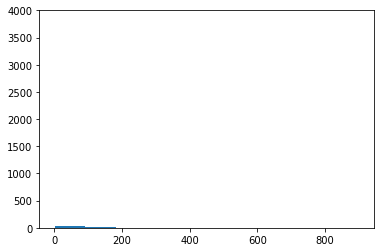

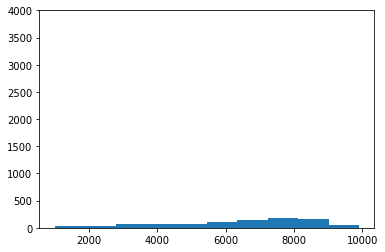

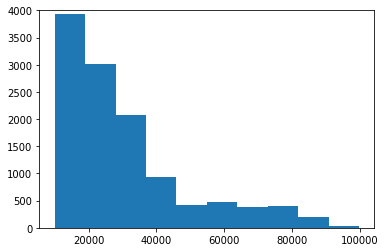

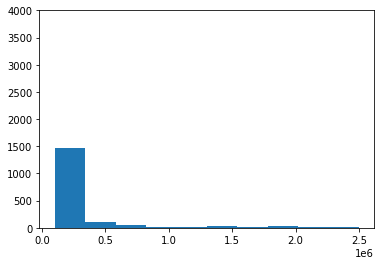

In [99]:
# df_rent['price'].plot(kind = 'hist')

plt.hist(df_rent[df_rent.price < 1000]['price'])
plt.ylim(0,4000)
plt.show()

plt.hist(df_rent[(df_rent.price >= 1000) & (df_rent.price < 10000)]['price'])
plt.ylim(0,4000)
plt.show()

plt.hist(df_rent[(df_rent.price >= 10000) & (df_rent.price < 100000)]['price'])
plt.ylim(0,4000)
plt.show()

# plt.hist(df_rent[(df_rent.price >= 100000) & (df_rent.price < 1000000)]['price'])
# plt.ylim(0,4000)
# plt.show()

plt.hist(df_rent[df_rent.price >= 100000]['price'])
plt.ylim(0,4000)
plt.show()

In [100]:
# import seaborn as sns

In [101]:
# g = sns.relplot(y="price_log", x="area", 
#                 data = df_rent,
#                 kind="scatter",
#                 height=5, aspect=2
#                )
# g.set_titles('{row_name}', fontsize=24)
# g.set_axis_labels('Area (Sq. ft.)', 'Price (log-transformed)')

# plt.show()

In [102]:
# g = sns.relplot(y="price_log", x="area", 
#                 data = df_sale,
#                 kind="scatter",
#                 height=5, aspect=2
#                )
# g.set_axis_labels('Area (Sq. ft.)', 'Price (log-transformed)')
# g.fig.suptitle('Price vs. area for each property type', fontsize=12, y=1.02)

# plt.show()

In [103]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14619 entries, 10859 to 33674
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            14619 non-null  float64
 1   area             14619 non-null  float64
 2   num_bath_rooms   14619 non-null  float64
 3   num_bed_rooms    14619 non-null  float64
 4   zone             14571 non-null  object 
 5   building_nature  14619 non-null  object 
 6   price_log        14619 non-null  float64
dtypes: float64(5), object(2)
memory usage: 913.7+ KB


In [104]:
df_rent.to_csv('df-rent.csv', index=False)

<br>


# Load `R` for linear mixed-effects models

In [105]:
# %load_ext rpy2.ipython

In [106]:
%%R

# Start fresh
rm(list = ls())
ls()

character(0)


In [107]:
%%R

# Load the packages
library(Matrix)
library(lme4)
library(merTools)


In [108]:
%%R
df.rent = read.csv("df-rent.csv")
ls()

[1] "df.rent"


In [109]:
%%R
summary(df.rent)

     price              area       num_bath_rooms  num_bed_rooms   
 Min.   :      1   Min.   :    1   Min.   : 1.00   Min.   : 0.000  
 1st Qu.:  16000   1st Qu.:  950   1st Qu.: 2.00   1st Qu.: 2.000  
 Median :  25000   Median : 1300   Median : 3.00   Median : 3.000  
 Mean   :  63654   Mean   : 1527   Mean   : 2.82   Mean   : 2.762  
 3rd Qu.:  50000   3rd Qu.: 2000   3rd Qu.: 3.00   3rd Qu.: 3.000  
 Max.   :2500000   Max.   :12000   Max.   :31.00   Max.   :10.000  
     zone           building_nature      price_log    
 Length:14619       Length:14619       Min.   : 0.00  
 Class :character   Class :character   1st Qu.: 9.68  
 Mode  :character   Mode  :character   Median :10.13  
                                       Mean   :10.30  
                                       3rd Qu.:10.82  
                                       Max.   :14.73  


In [110]:
%%R
dim(df.rent)

[1] 14619     7


In [111]:
%%R

# Make 'zone' and 'building_nature' as factor for using it as a random effect
df.rent$zone = as.factor(df.rent$zone)
df.rent$building_nature = as.factor(df.rent$building_nature)

### Fit an `lmer` model

In [112]:
%%R
lmer.rent.allZones = lmer(price_log ~ 
                          area + 
                          num_bath_rooms + 
                          num_bed_rooms + 
                          (1 | zone) + (1 | building_nature), 
                          data = df.rent)


In [113]:
%%R
summary(lmer.rent.allZones)

Linear mixed model fit by REML ['lmerMod']
Formula: price_log ~ area + num_bath_rooms + num_bed_rooms + (1 | zone) +  
    (1 | building_nature)
   Data: df.rent

REML criterion at convergence: 32023

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-15.2774  -0.3184  -0.0724   0.2005   6.9924 

Random effects:
 Groups          Name        Variance Std.Dev.
 zone            (Intercept) 0.41580  0.6448  
 building_nature (Intercept) 0.01844  0.1358  
 Residual                    0.51489  0.7176  
Number of obs: 14619, groups:  zone, 61; building_nature, 2

Fixed effects:
                Estimate Std. Error t value
(Intercept)    9.058e+00  1.338e-01  67.694
area           4.729e-04  1.028e-05  46.025
num_bath_rooms 5.253e-02  8.716e-03   6.027
num_bed_rooms  5.007e-02  9.384e-03   5.335

Correlation of Fixed Effects:
            (Intr) area   nm_bt_
area        -0.012              
num_bth_rms -0.046 -0.347       
num_bed_rms -0.066 -0.268 -0.408


In [114]:
%%R
# Calculate RMSE
RMSE.merMod(lmer.rent.allZones)

[1] 0.7162218


### Save the model for generating predictions

In [115]:
%%R

saveRDS(lmer.rent.allZones, file = "lmer.rent.allZones.rds")